<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N¬∞05





**Objetivo**: Explorar y visualizar datos de Netflix usando **matplotlib** y **seaborn/plotly**, aprendiendo a elegir gr√°ficos adecuados para distintos tipos de variables y preguntas de an√°lisis.



**Dataset**:

Trabajaremos con el archivo `netflix_titles.csv`, que contiene informaci√≥n sobre los t√≠tulos disponibles en la plataforma Netflix hasta el a√±o 2021.

| Variable       | Clase     | Descripci√≥n                                                                 |
|----------------|-----------|------------------------------------------------------------------------------|
| show_id        | caracter  | Identificador √∫nico del t√≠tulo en el cat√°logo de Netflix.                   |
| type           | caracter  | Tipo de contenido: 'Movie' o 'TV Show'.                                     |
| title          | caracter  | T√≠tulo del contenido.                                                       |
| director       | caracter  | Nombre del director (puede ser nulo).                                       |
| cast           | caracter  | Lista de actores principales (puede ser nulo).                              |
| country        | caracter  | Pa√≠s o pa√≠ses donde se produjo el contenido.                                |
| date_added     | fecha     | Fecha en la que el t√≠tulo fue agregado al cat√°logo de Netflix.              |
| release_year   | entero    | A√±o de lanzamiento original del t√≠tulo.                                     |
| rating         | caracter  | Clasificaci√≥n por edad (por ejemplo: 'PG-13', 'TV-MA').                      |
| duration       | caracter  | Duraci√≥n del contenido (minutos o n√∫mero de temporadas para series).        |
| listed_in      | caracter  | Categor√≠as o g√©neros en los que est√° clasificado el contenido.              |
| description    | caracter  | Breve sinopsis del contenido.                                               |




In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

In [107]:
# Cargar datos
df = pd.read_csv('https://raw.githubusercontent.com/fralfaro/MAT281/main/docs/labs/data/netflix_titles.csv')
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

## üìä Parte 1: Exploraci√≥n visual b√°sica

1. **Distribuci√≥n de tipos de contenido**

   * Realiza un gr√°fico de barras mostrando la cantidad de pel√≠culas vs series (`type`).
   * Pregunta gu√≠a: ¬øCu√°l es el tipo de contenido predominante en Netflix? ¬øQu√© implicancias podr√≠a tener para los usuarios?

2. **Histograma de a√±os de lanzamiento**

   * Muestra c√≥mo se distribuyen los t√≠tulos seg√∫n su `release_year`.
   * Pregunta gu√≠a: ¬øHay m√°s contenido reciente o antiguo? ¬øNotas alg√∫n patr√≥n en d√©cadas espec√≠ficas?

3. **Proporci√≥n de clasificaciones por edad (`rating`)**

   * Haz un gr√°fico circular o de barras.
   * Pregunta gu√≠a: ¬øQu√© clasificaci√≥n es m√°s com√∫n? ¬øCrees que Netflix est√° m√°s enfocado en p√∫blico adulto, familiar o infantil?



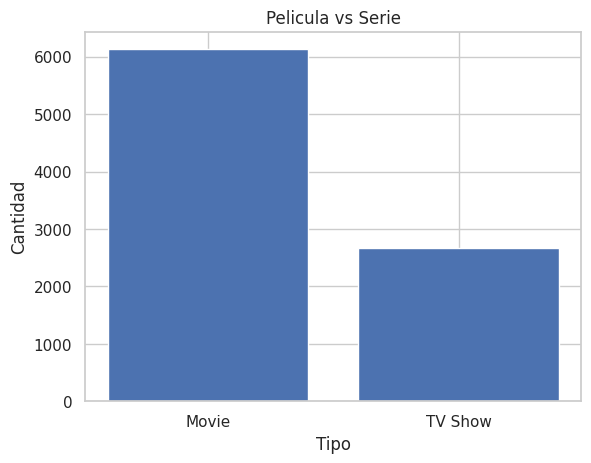

In [108]:
#1
x=df['type'].value_counts().index
y=df['type'].value_counts().values
plt.bar(x,y)

plt.xlabel('Tipo')
plt.ylabel('Cantidad')
plt.title('Pelicula vs Serie')

plt.show()

El tipo predominante son las peliculas, puede ser una buena opcion para personas que buscan este tipo de contenido ya que ofrecen una alta cantidad y diversidad.


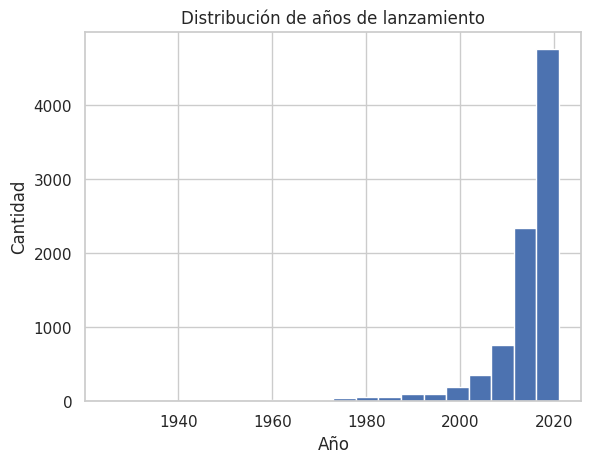

In [109]:
#2
plt.hist(df['release_year'], bins=20)

plt.xlabel('A√±o')
plt.ylabel('Cantidad')
plt.title('Distribuci√≥n de a√±os de lanzamiento')
plt.show()

Hay m√°s contenido reciente sobretodo de 2020 y poco contenido antiguo, se puede apreciar el crecimiento acelerado que ha tenido desde la decada del 2010.

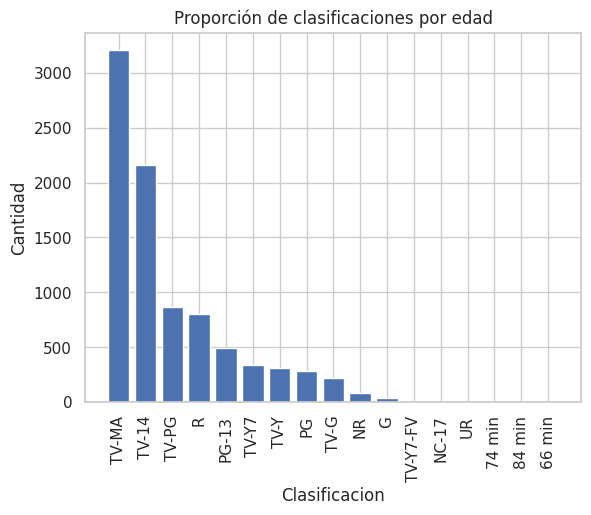

In [110]:
#3
x=df['rating'].value_counts().index
y=df['rating'].value_counts().values

plt.bar(x,y)
plt.xlabel('Clasificacion')
plt.ylabel('Cantidad')
plt.title('Proporci√≥n de clasificaciones por edad')
plt.xticks(rotation=90)
plt.show()

La clasificacion m√°s com√∫n es TV-MA, con esto podemos ver que netflix se enfoca m√°s en el publico adulto pero aun asi no descuida al publico familiar al ser la segunda mas popular TV-14



## üé® Parte 2: Tendencias y evoluci√≥n en el tiempo

4. **N√∫mero de t√≠tulos agregados por a√±o**

   * Usa `date_added` (convertido a fecha) y grafica una serie temporal.
   * Pregunta gu√≠a: ¬øCu√°ndo creci√≥ m√°s el cat√°logo de Netflix? ¬øQu√© relaci√≥n podr√≠a tener con la expansi√≥n internacional de la plataforma?

5. **Heatmap de lanzamientos por a√±o y mes**

   * Construye un mapa de calor con `year_added` y `month_added`.
   * Pregunta gu√≠a: ¬øHay meses con m√°s estrenos que otros? ¬øQu√© conclusiones puedes sacar sobre la estacionalidad de lanzamientos?

6. **Duraci√≥n de pel√≠culas por g√©nero**

   * Extrae la duraci√≥n en minutos y crea un boxplot agrupado por g√©nero principal.
   * Pregunta gu√≠a: ¬øQu√© g√©neros suelen durar m√°s? ¬øQu√© podr√≠as decir sobre la variabilidad dentro de un mismo g√©nero?


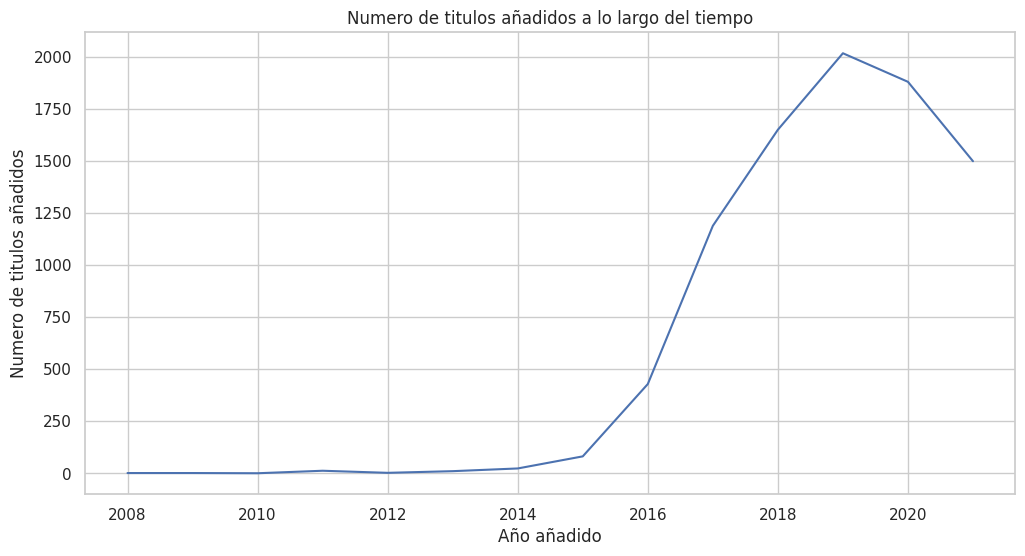

In [111]:
#4
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce', format='mixed')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df_plots = df.groupby('year_added').size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_plots, x='year_added', y='count')
plt.xlabel('A√±o a√±adido')
plt.ylabel('Numero de titulos a√±adidos')
plt.title('Numero de titulos a√±adidos a lo largo del tiempo')
plt.show()

El a√±o en que m√°s crecio el catalogo due en 2019, esto debido a la aparici√≥n de nuevas plataformas que le hacen competencia permitiendo diferenciarse de ellas


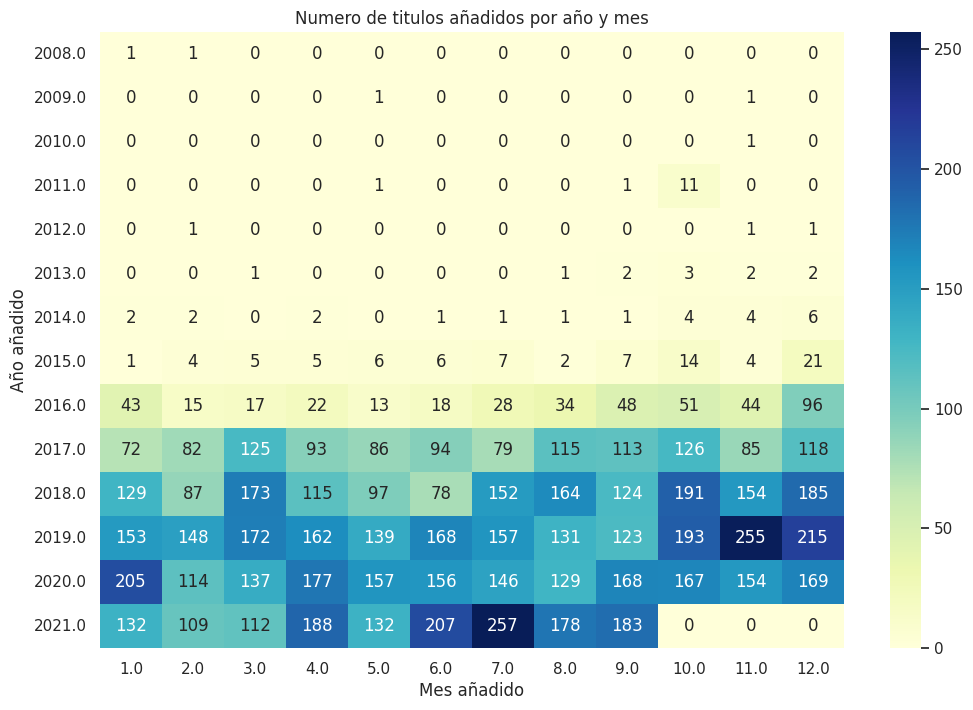

In [112]:
#5

heatmap_data = df.groupby(['year_added', 'month_added']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', fmt='d', annot=True)
plt.xlabel('Mes a√±adido')
plt.ylabel('A√±o a√±adido')
plt.title('Numero de titulos a√±adidos por a√±o y mes')
plt.show()

Se puede apreciar que los meses con m√°s estrenos son Julio, Octubre y DIciembre hace pensar que faltan datos de estos ultimos meses, pero coinciden con temporadas de vacaciones asi utilizan una estrategia de lanzamiento para que sea visto por el mayor numero de personas posible

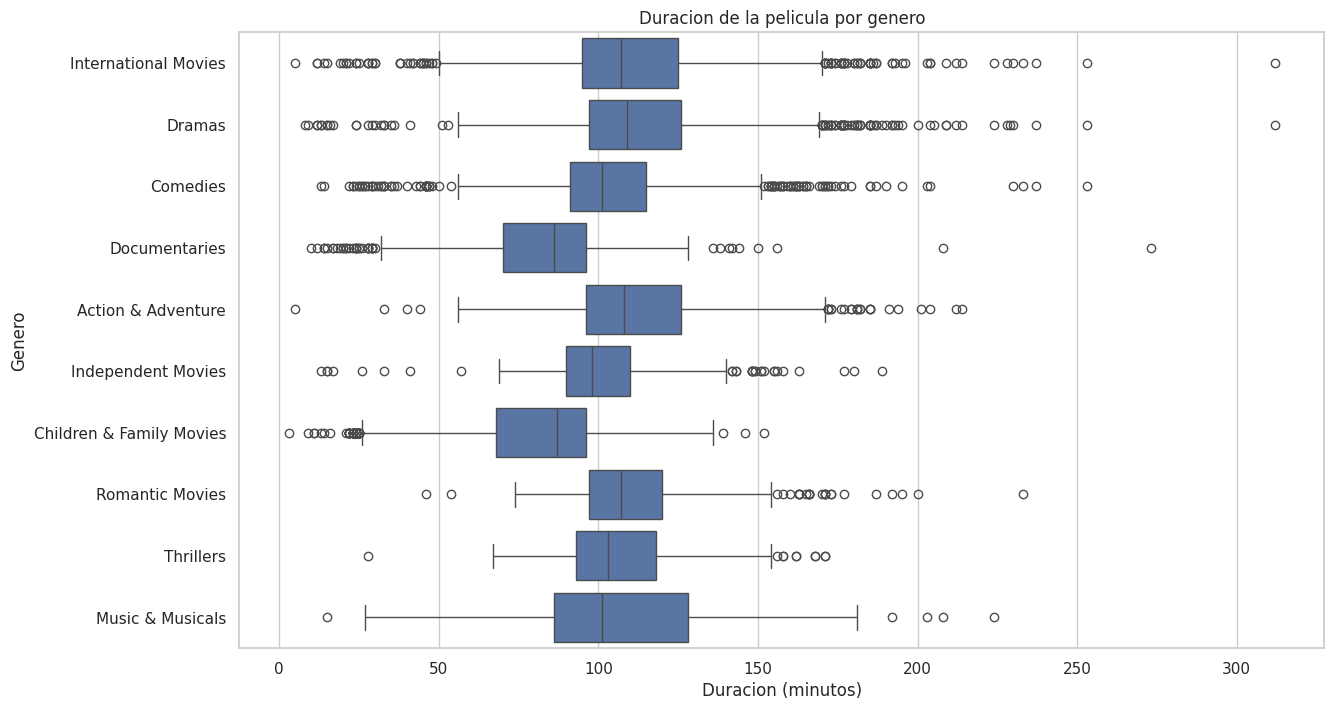

In [113]:
#6
movies_df = df[df['type'] == 'Movie'].copy()
movies_df['duration_minutes'] = movies_df['duration'].str.replace(' min', '').astype(float)

movies_df['listed_in'] = movies_df['listed_in'].str.split(', ')
movies_genres = movies_df.explode('listed_in').reset_index(drop=True)

plt.figure(figsize=(14, 8))
sns.boxplot(data=movies_genres, x='duration_minutes', y='listed_in', order=movies_genres['listed_in'].value_counts().index[:10])
plt.xlabel('Duracion (minutos)')
plt.ylabel('Genero')
plt.title('Duracion de la pelicula por genero')
plt.show()

Los generos que suelen durar m√°s son los dramas, acci√≥n y aventura, peliculas romanticas y peliculas internacionales, hay algunos generos que muestran altas variabilidades como la musica y musicales o peliculas internacionales las cuales pueden ser por las diferencias culturales o distintos enfoques, mientras que las comedias o documentales muestran baja variabilidad por lo cual son mas consistentes y predecibles.



## üî• Parte 3: Comparaciones y relaciones

7. **Top 10 pa√≠ses con m√°s producciones**

   * Usa un gr√°fico de barras para mostrar los pa√≠ses m√°s frecuentes en la columna `country`.
   * Pregunta gu√≠a: ¬øQu√© pa√≠ses dominan el cat√°logo? ¬øSorprende la distribuci√≥n o es esperada?

8. **Pel√≠culas vs Series seg√∫n g√©nero**

   * Realiza un gr√°fico de barras apiladas para mostrar la cantidad de t√≠tulos por g√©nero, separando `Movie` y `TV Show`.
   * Pregunta gu√≠a: ¬øExisten g√©neros m√°s asociados a pel√≠culas o a series?

9. **Relaci√≥n entre duraci√≥n y a√±o de lanzamiento**

   * Haz un gr√°fico de dispersi√≥n (scatterplot) con `release_year` en el eje X y `duration` (en minutos) en el eje Y.
   * Pregunta gu√≠a: ¬øHan cambiado los est√°ndares de duraci√≥n de las pel√≠culas con el tiempo? ¬øSe ven outliers interesantes?



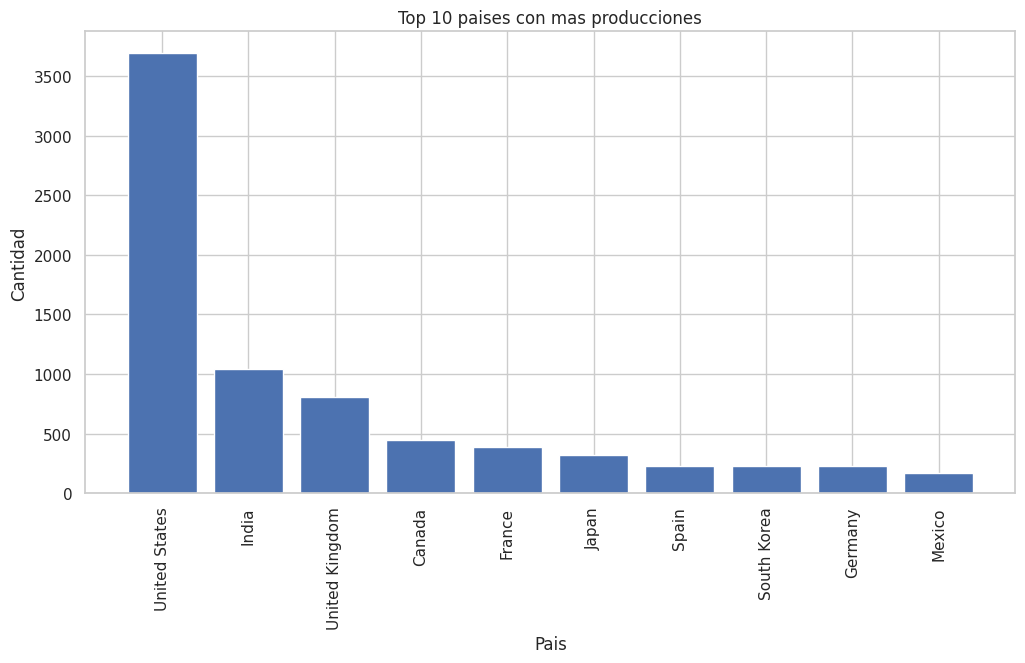

In [114]:
#7
country_counts = df['country'].str.split(', ').explode().value_counts()
top_10_countries = country_counts.head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_countries.index, top_10_countries.values)
plt.xlabel('Pais')
plt.ylabel('Cantidad')
plt.title('Top 10 paises con mas producciones')
plt.xticks(rotation=90)
plt.show()

El pais que m√°s domina es Estados Unidos, esto no es sorprendente ya que la mayor industria del cine se encuentra ubicada ahi, de igual manera en India


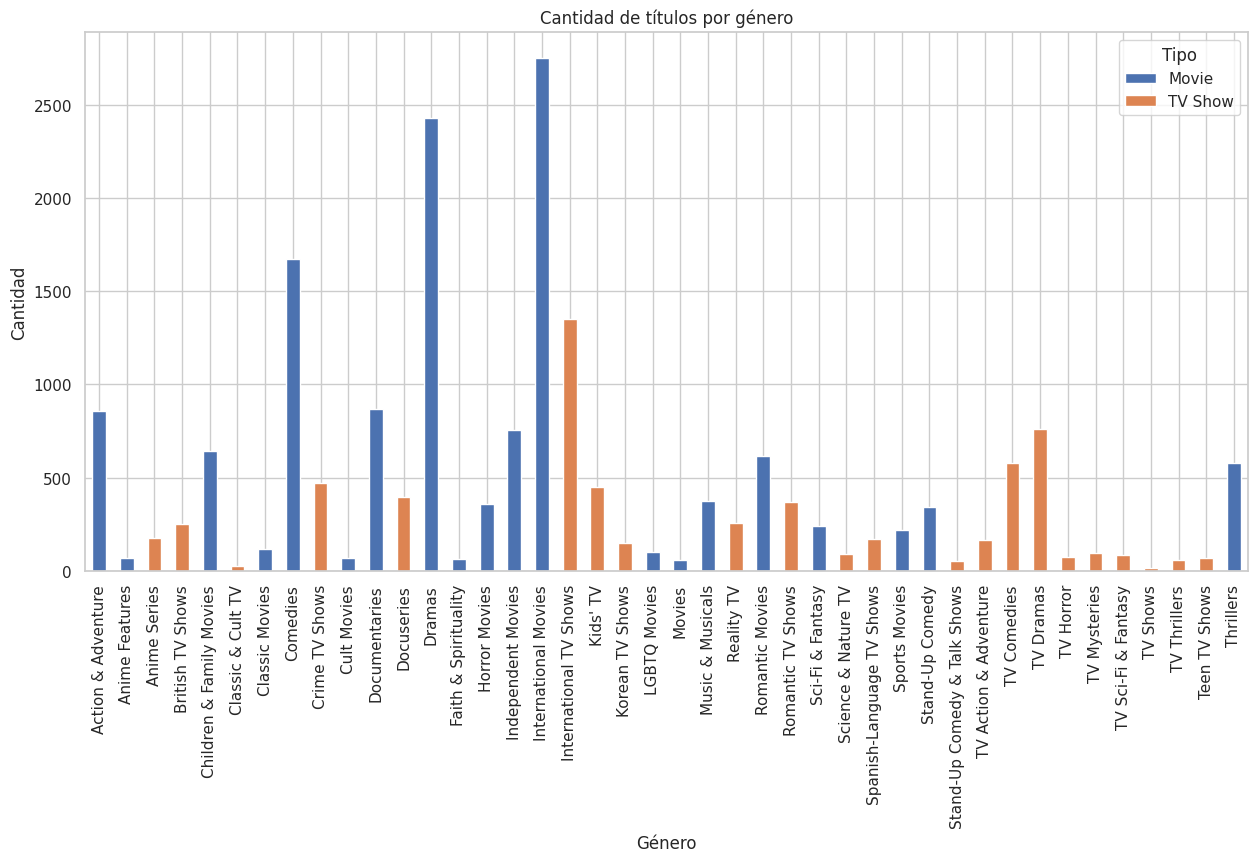

In [115]:
#8
df['listed_in'] = df['listed_in'].str.split(', ')

genres_df = df.explode('listed_in')
genres_counts = genres_df.groupby(['listed_in', 'type']).size().unstack(fill_value=0)
genres_counts = genres_counts.apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)
genres_counts.plot(kind='bar', stacked=True, figsize=(15, 7))

plt.xlabel('G√©nero')
plt.ylabel('Cantidad')
plt.title('Cantidad de t√≠tulos por g√©nero')
plt.legend(title='Tipo')
plt.xticks(rotation=90)
plt.show()

Hay algunos que se ventran mucho mas en la industria de las series como el anime, reality y otros en peliculas como accion y aventura o comedias

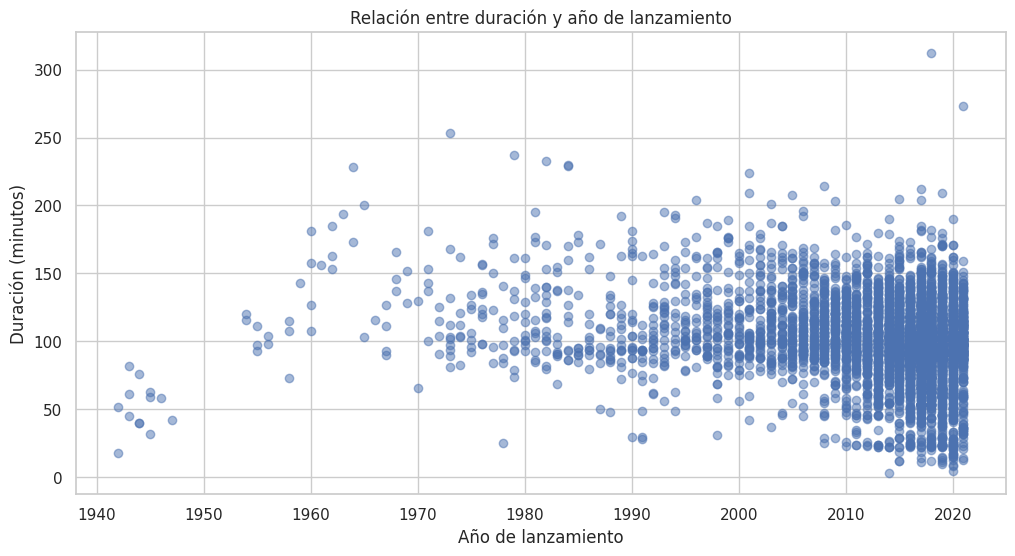

In [116]:
#9
movies_df = df[df['type'] == 'Movie'].copy()
movies_df['duration_minutes'] = movies_df['duration'].str.replace(' min', '').astype(float)
movies_df['release_year'] = movies_df['release_year'].astype(int)

plt.figure(figsize=(12, 6))
plt.scatter(movies_df['release_year'], movies_df['duration_minutes'], alpha=0.5)
plt.xlabel('A√±o de lanzamiento')
plt.ylabel('Duraci√≥n (minutos)')
plt.title('Relaci√≥n entre duraci√≥n y a√±o de lanzamiento')
plt.show()


Se puede ver que a lo largo del tiempo las peliculas entre el 40 y 60 eran mas cortas en comparacion a las actuales ya que aunque existe dispersion se ve una tendencia entre 90 y 120 minutos

## ‚≠ê Desaf√≠o Final

* Encuentra las combinaciones m√°s frecuentes de **g√©nero + rating** y repres√©ntalas en un **heatmap o gr√°fico de burbujas**.
* Pregunta gu√≠a: ¬øQu√© g√©neros est√°n m√°s dirigidos a un p√∫blico adulto? ¬øY cu√°les a p√∫blico familiar o infantil?

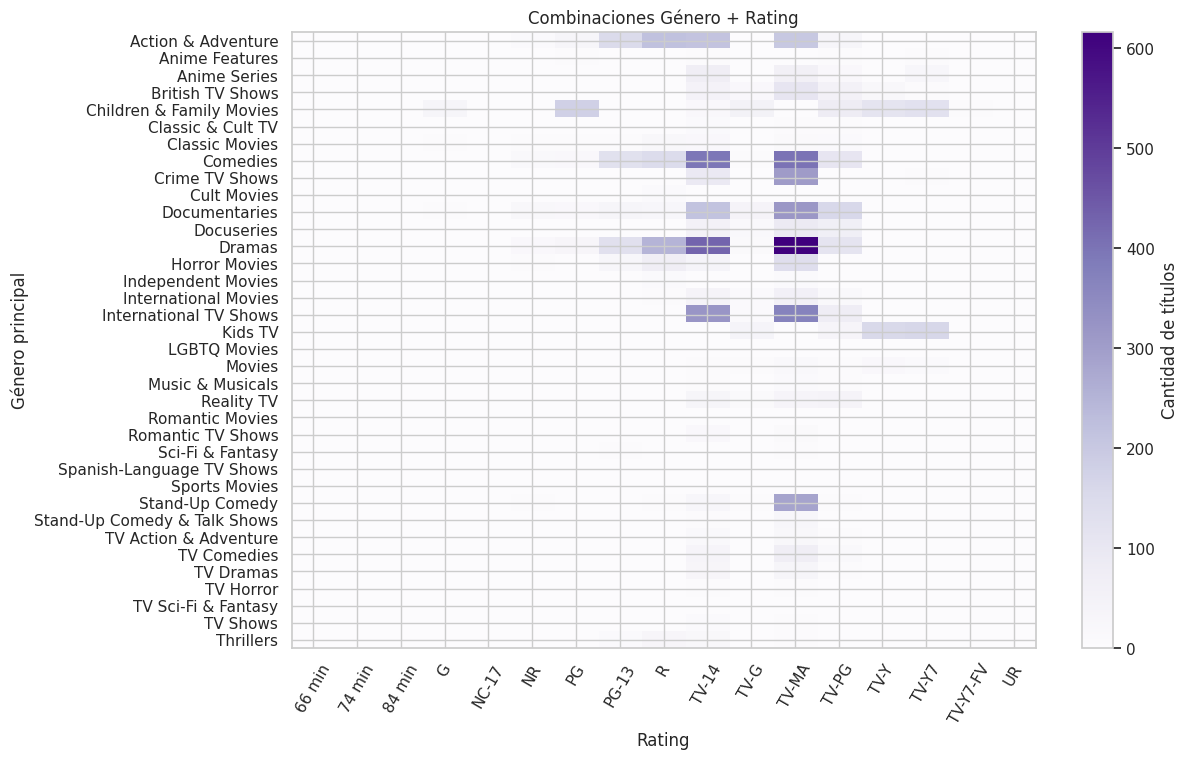

In [117]:
#Desafio Final

df_clean = df.dropna(subset=["rating"]).copy()
df_clean['first_genre'] = df_clean['listed_in'].apply(lambda x: str(x).split(',')[0].strip())
df_clean['first_genre'] = df_clean['first_genre'].str.replace(r"[\[\]\'\"]", "", regex=True)
genre_rating_counts = df_clean.groupby(['first_genre', 'rating']).size().unstack(fill_value=0)

data = genre_rating_counts.values
genres = genre_rating_counts.index
ratings = genre_rating_counts.columns

plt.figure(figsize=(12,8))
plt.imshow(data, cmap='Purples', aspect='auto')
plt.xticks(range(len(ratings)), ratings, rotation=60)
plt.yticks(range(len(genres)), genres)
plt.colorbar(label='Cantidad de t√≠tulos')
plt.xlabel('Rating')
plt.ylabel('G√©nero principal')
plt.title('Combinaciones G√©nero + Rating')
plt.show()


Podemos ver que para TV-MA hay una alta cantidad de dramas o tv de crimen o peliculas de horror entre otros por lo que estas estan mas orientadas a adultos, mientras que family movies o kids tv son mas orientados a publico infantil o familiar